In [1]:
#CS 513: Knowledge Discovery and Data 
#Group Members: Danica Lacuesta, Joelle An, and Raj Rana 
#Author: Danica Lacuesta
#20014543
#"I pledge my honor that I have abided by the Stevens Honor System"
#Purpose: This project analyzes digital activity patterns to classify user stress levels and identify the behavioral features that most strongly impact predictive accuracy.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
df = pd.read_csv("data/Digital_Stress_Classifier_preprocess.csv")
df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Stress_Binary,Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,1.110090,-1.427055,0.456182,-0.611571,1.832943,1.073037,1,0,1,0,1,0,0,0,0,0
1,-0.298363,-0.247258,0.456182,1.001936,0.406841,1.073037,1,0,0,1,0,0,1,0,0,0
2,-1.002590,1.109509,-0.203486,-1.149407,0.406841,-1.584773,1,0,0,1,0,0,0,0,0,1
3,0.305259,0.106681,0.456182,-1.149407,-1.019260,-0.255868,1,1,0,0,0,0,0,1,0,0
4,0.104052,0.873549,-1.522823,1.001936,-1.019260,-0.255868,1,1,0,0,0,0,0,0,1,0


In [32]:
X = df.drop("Stress_Binary", axis=1)
y = df["Stress_Binary"]

X.head(), y.head()

(        Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
 0  1.110090               -1.427055             0.456182   
 1 -0.298363               -0.247258             0.456182   
 2 -1.002590                1.109509            -0.203486   
 3  0.305259                0.106681             0.456182   
 4  0.104052                0.873549            -1.522823   
 
    Days_Without_Social_Media  Exercise_Frequency(week)  Happiness_Index(1-10)  \
 0                  -0.611571                  1.832943               1.073037   
 1                   1.001936                  0.406841               1.073037   
 2                  -1.149407                  0.406841              -1.584773   
 3                  -1.149407                 -1.019260              -0.255868   
 4                   1.001936                 -1.019260              -0.255868   
 
    Gender_Female  Gender_Male  Gender_Other  Social_Media_Platform_Facebook  \
 0              0            1             0              

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((347, 15), (149, 15))

In [34]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", log_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.87248322147651

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.90      0.94      0.92       114

    accuracy                           0.87       149
   macro avg       0.83      0.80      0.81       149
weighted avg       0.87      0.87      0.87       149



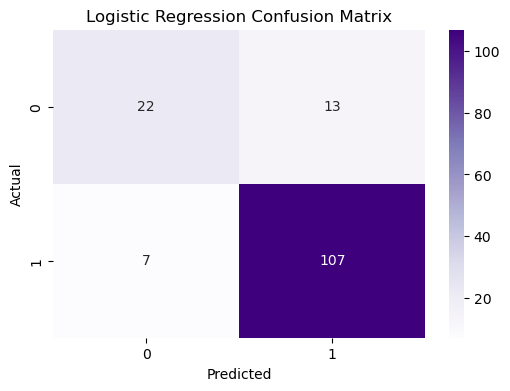

In [25]:
cm_log = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

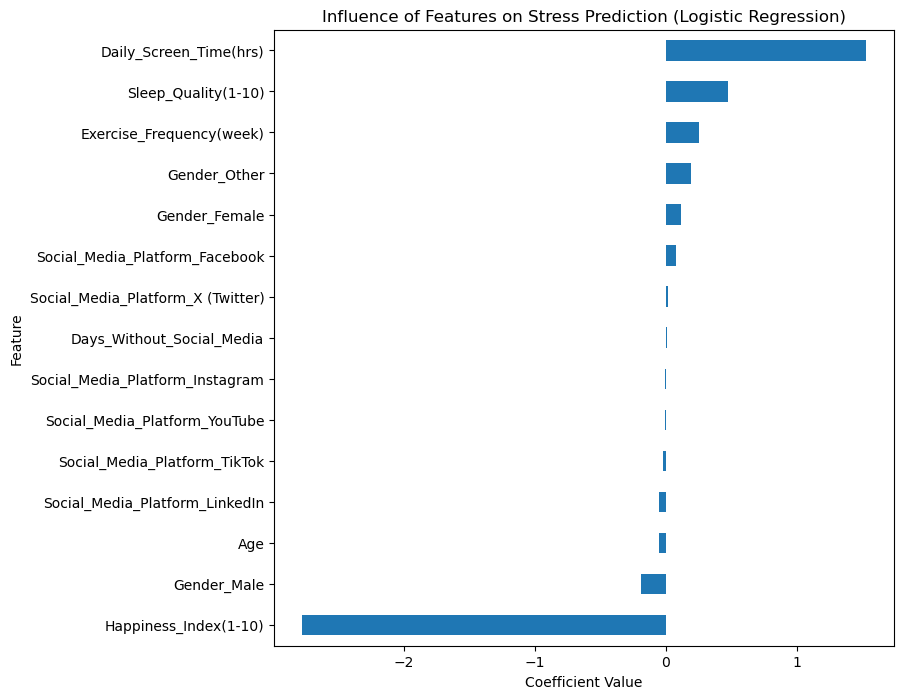

Age                                 -0.052296
Daily_Screen_Time(hrs)               1.526870
Sleep_Quality(1-10)                  0.474185
Days_Without_Social_Media            0.009206
Exercise_Frequency(week)             0.255560
Happiness_Index(1-10)               -2.778088
Gender_Female                        0.112383
Gender_Male                         -0.192675
Gender_Other                         0.191960
Social_Media_Platform_Facebook       0.073401
Social_Media_Platform_Instagram     -0.004919
Social_Media_Platform_LinkedIn      -0.050091
Social_Media_Platform_TikTok        -0.025715
Social_Media_Platform_X (Twitter)    0.018068
Social_Media_Platform_YouTube       -0.008281
dtype: float64

In [24]:
log_coeffs = pd.Series(log_model.coef_[0], index=X.columns)

plt.figure(figsize=(8,8))
log_coeffs.sort_values().plot(kind="barh")
plt.title("Influence of Features on Stress Prediction (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

log_coeffs

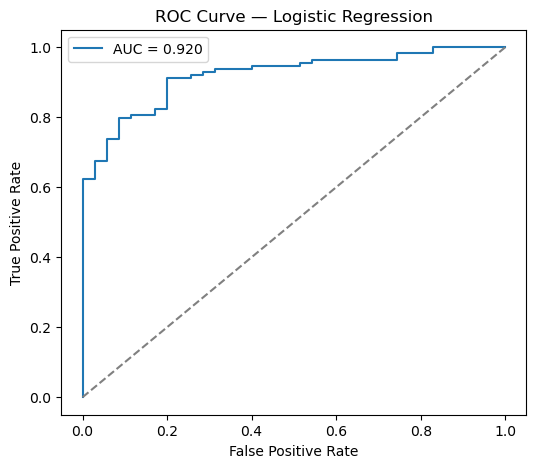

In [26]:
#source https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

#get predicted probabilities for the positive class (stress = 1)
log_proba = log_model.predict_proba(X_test)[:, 1]

#compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, log_proba)
roc_auc = auc(fpr, tpr)

#plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()

#save as png
plt.savefig("visuals_logreg/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()


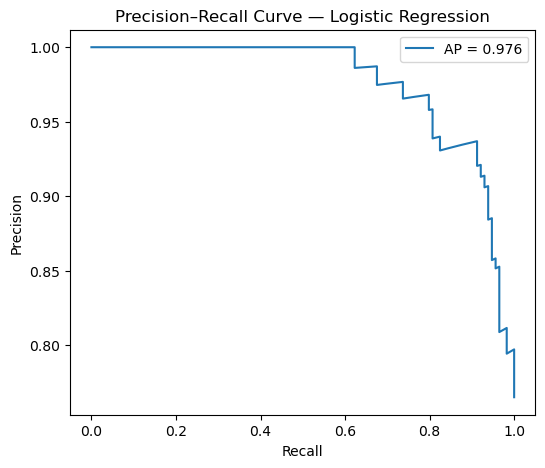

In [27]:
#source https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, log_proba)
avg_precision = average_precision_score(y_test, log_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Logistic Regression")
plt.legend()
plt.savefig("visuals_logreg/precision_recall_curve.png", dpi=300, bbox_inches="tight")
plt.show()


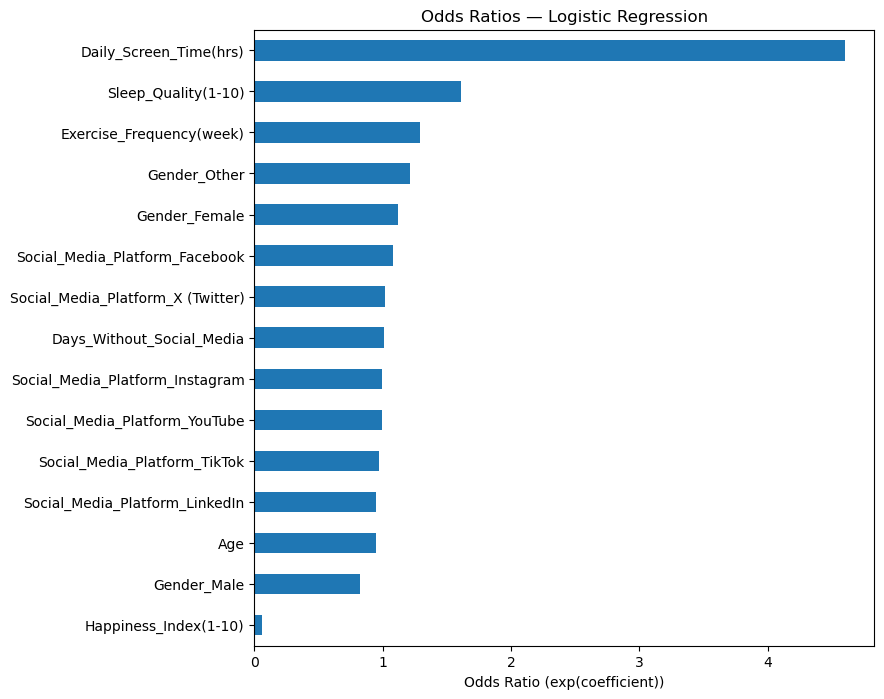

Age                                  0.949048
Daily_Screen_Time(hrs)               4.603743
Sleep_Quality(1-10)                  1.606705
Days_Without_Social_Media            1.009249
Exercise_Frequency(week)             1.291184
Happiness_Index(1-10)                0.062157
Gender_Female                        1.118941
Gender_Male                          0.824750
Gender_Other                         1.211622
Social_Media_Platform_Facebook       1.076162
Social_Media_Platform_Instagram      0.995093
Social_Media_Platform_LinkedIn       0.951143
Social_Media_Platform_TikTok         0.974613
Social_Media_Platform_X (Twitter)    1.018232
Social_Media_Platform_YouTube        0.991753
dtype: float64

In [28]:
#coefficients (raw)
coeffs = pd.Series(log_model.coef_[0], index=X.columns)

#convert to Odds Ratios
odds_ratios = np.exp(coeffs)

plt.figure(figsize=(8,8))
odds_ratios.sort_values().plot(kind="barh")
plt.title("Odds Ratios — Logistic Regression")
plt.xlabel("Odds Ratio (exp(coefficient))")
plt.savefig("visuals_logreg/odds_ratios.png", dpi=300, bbox_inches="tight")

plt.show()

odds_ratios
